In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bio1=pd.read_csv("api_data_aadhar_biometric\\api_data_aadhar_biometric_0_500000.csv")
bio2=pd.read_csv("api_data_aadhar_biometric\\api_data_aadhar_biometric_500000_1000000.csv")
bio3=pd.read_csv("api_data_aadhar_biometric\\api_data_aadhar_biometric_1000000_1500000.csv")
bio4=pd.read_csv("api_data_aadhar_biometric\\api_data_aadhar_biometric_1500000_1861108.csv")

In [3]:
# Merging all the 4 parts of biometric data into a single dataframe
biometric=pd.concat([bio1,bio2,bio3,bio4],ignore_index=True)

In [4]:
#verifying the merge
print(
    len(bio1) + len(bio2) + len(bio3) + len(bio4),
    len(biometric)
)

1861108 1861108


In [5]:
print("Biometric Dataset:")
print("\n\nHead about the dataset:")
print(biometric.head())
print("----------------------------------------")
print("\n\nShape about the dataset:")
print(biometric.shape)
print("----------------------------------------")
print("\n\nColumns about the dataset:")
print(biometric.columns)
print("----------------------------------------")
print("\n\nNumber of duplicated rows in the dataset:")
print(biometric.duplicated().sum())
print("----------------------------------------")
print("\n\nInformation about the dataset:")
print(biometric.info())
print("----------------------------------------")
print("\n\nStatistical summary of the dataset:")
print(biometric.describe())
print("----------------------------------------")
print("\n\nChecking for missing values in each column:")
print(biometric.isnull().sum())

Biometric Dataset:


Head about the dataset:
         date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815  
----------------------------------------


Shape about the dataset:
(1861108, 6)
----------------------------------------


Columns about the dataset:
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')
----------------------------------------


Number of duplicated rows in the dataset:
94896
----------------------------------------


Information about the dataset:
<cl

In [6]:
#converting date columns to datetime format
biometric['date'] = pd.to_datetime(biometric['date'], format='%d-%m-%Y')
#verifying the conversion
print(biometric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB
None


PINCODE WISE STATE & DISTRICT CORRECTION

In [7]:
pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")

C:\Users\JYOTI GUPTA\AppData\Local\Temp\ipykernel_21408\1518679534.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")


In [8]:
#Ensure columns are strings and convert to title case
pincode['state'] = pincode['state'].astype(str).str.title()
pincode['district'] = pincode['district'].astype(str).str.title()

In [9]:
print("Pincode Dataset:")
print("\n\nHead about the dataset:")
print(pincode.head())
print("----------------------------------------")
print("\n\nShape about the dataset:")
print(pincode.shape)
print("----------------------------------------")
print("\n\nColumns about the dataset:")
print(pincode.columns)
print("----------------------------------------")
print("\n\nNumber of duplicated rows in the dataset:")
print(pincode.duplicated().sum())
print("----------------------------------------")
print("\n\nInformation about the dataset:")
print(pincode.info())
print("----------------------------------------")
print("\n\nStatistical summary of the dataset:")
print(pincode.describe())
print("----------------------------------------")
print("\n\nChecking for missing values in each column:")
print(pincode.isnull().sum())

Pincode Dataset:


Head about the dataset:
    pincode                district      state Unnamed: 3
0  504273.0  Kumuram Bheem Asifabad  Telangana        NaN
1  504299.0  Kumuram Bheem Asifabad  Telangana        NaN
2  504296.0  Kumuram Bheem Asifabad  Telangana        NaN
3  504209.0              Mancherial  Telangana        NaN
4  504272.0              Mancherial  Telangana        NaN
----------------------------------------


Shape about the dataset:
(172775, 4)
----------------------------------------


Columns about the dataset:
Index(['pincode', 'district', 'state', 'Unnamed: 3'], dtype='object')
----------------------------------------


Number of duplicated rows in the dataset:
148746
----------------------------------------


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172775 entries, 0 to 172774
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pincode     24025 non-nu

In [10]:
pincode.rename(columns={'pincode': 'pincode_master', 'district': 'district_master', 'state': 'state_master'}, inplace=True)

In [11]:
pincode.groupby('pincode_master').size().sort_values(ascending=False)

pincode_master
535273.0    4
853204.0    4
795145.0    4
612203.0    4
193501.0    4
           ..
854326.0    1
854327.0    1
854328.0    1
854329.0    1
854330.0    1
Length: 20490, dtype: int64

In [12]:
pincode = (
    pincode
    .groupby('pincode_master', as_index=False)
    .agg({
        'district_master': 'first',
        'state_master': 'first'
    })
)

In [13]:
pincode_count_by_state = (
    pincode
    .groupby('state_master')['pincode_master']
    .nunique()
    .sort_values(ascending=False)
)

print(pincode_count_by_state)


state_master
Tamil Nadu                                  2108
Uttar Pradesh                               1800
Maharashtra                                 1650
Kerala                                      1439
Karnataka                                   1409
West Bengal                                 1383
Andhra Pradesh                              1257
Gujarat                                     1080
Rajasthan                                   1048
Odisha                                       978
Bihar                                        965
Madhya Pradesh                               823
Telangana                                    702
Assam                                        585
Punjab                                       550
Himachal Pradesh                             459
Jharkhand                                    402
Haryana                                      326
Uttarakhand                                  314
Chhattisgarh                                 290
Jammu A

In [14]:
pincode_count_by_district = (
    pincode
    .groupby(['state_master', 'district_master'])['pincode_master']
    .nunique()
    .reset_index(name='pincode_count')
)
pincode_count_by_district

,state_master,district_master,pincode_count
0,Andaman And Nicobar Islands,Nicobar,4
1,Andaman And Nicobar Islands,North And Middle Andaman,7
2,Andaman And Nicobar Islands,South Andaman,11
3,Andhra Pradesh,Alluri Sitharama Raju,19
4,Andhra Pradesh,Anakapalli,24
...,...,...,...
783,West Bengal,Purba Bardhaman,87
784,West Bengal,Purba Medinipur,102
785,West Bengal,Purulia,44
786,West Bengal,South 24 Parganas,79


In [15]:
pincode_conflicts = (
    pincode
    .groupby('pincode_master')
    .agg({
        'state_master': 'nunique',
        'district_master': 'nunique'
    })
    .query('state_master > 1 or district_master > 1')
)

print(pincode_conflicts)


Empty DataFrame
Columns: [state_master, district_master]
Index: []


In [16]:
pincode = (
    pincode
    .drop_duplicates(subset=['pincode_master'])
    [['pincode_master', 'state_master', 'district_master']]
)


In [17]:
# Ensure pincode is consistent datatype
#master_pincode_df['pincode_master'] = master_pincode_df['pincode_master'].astype(int)

# Final geography dimension (PK = pincode_master)
pincode_final = (
    pincode
    .drop_duplicates(subset=['pincode_master'])
    [['pincode_master', 'state_master', 'district_master']]
)

# Safety check
assert pincode_final['pincode_master'].is_unique, "Duplicate pincodes in geography dimension!"


STATE & DISTRICT MAPPING

In [18]:
biometric = biometric.merge(
    pincode_final,
    left_on='pincode',           # FK in fact table
    right_on='pincode_master',   # PK in dimension table
    how='left',
    validate='many_to_one'       # FK → PK enforcement
)

In [19]:
assert biometric.shape[0] == biometric.shape[0], \
       "Row count changed after geography enrichment!"


In [20]:
unmatched = biometric['state_master'].isna().sum()
print("Unmatched pincodes:", unmatched)


Unmatched pincodes: 0


In [21]:
biometric[['pincode', 'pincode_master', 'state_master', 'district_master']].nunique()

pincode            19707
pincode_master     19707
state_master          36
district_master      780
dtype: int64

In [22]:
biometric.shape

(1861108, 9)

In [23]:
unmatched_rows = biometric[
    biometric['state_master'].isna()
]

unmatched_rows[['pincode', 'state', 'district']].head(20)


,pincode,state,district


In [24]:
unmatched_pincodes = (
    biometric
    .loc[biometric['state_master'].isna(), 'pincode']
    .dropna()
    .unique()
)

len(unmatched_pincodes)

0

HANDLING DUPLICATES VALUE AFTER STATE & DISTRICT MAPPING

In [25]:
#understanding the duplicated rows
dup_keys = biometric.duplicated(
    subset=['date', 'state', 'district', 'pincode','bio_age_5_17','bio_age_17_','pincode_master','state_master','district_master'],
    keep=False
)
biometric[dup_keys].head(10)

,date,state,district,pincode,bio_age_5_17,bio_age_17_,pincode_master,state_master,district_master
109994,2025-09-01,Chhattisgarh,Kondagaon,494229,0,1,494229.0,Chhattisgarh,Kondagaon
109995,2025-09-01,Chhattisgarh,Kondagaon,494230,1,0,494230.0,Chhattisgarh,Kondagaon
109996,2025-09-01,Chhattisgarh,Korba,495119,5,35,495119.0,Chhattisgarh,Gaurella Pendra Marwahi
109997,2025-09-01,Chhattisgarh,Korba,495446,0,16,495446.0,Chhattisgarh,Korba
109998,2025-09-01,Chhattisgarh,Korba,495674,10,34,495674.0,Chhattisgarh,Korba
109999,2025-09-01,Chhattisgarh,Korba,495683,0,3,495683.0,Chhattisgarh,Korba
110000,2025-09-01,Chhattisgarh,Kondagaon,494229,0,1,494229.0,Chhattisgarh,Kondagaon
110001,2025-09-01,Chhattisgarh,Kondagaon,494230,1,0,494230.0,Chhattisgarh,Kondagaon
110002,2025-09-01,Chhattisgarh,Korba,495119,5,35,495119.0,Chhattisgarh,Gaurella Pendra Marwahi
110003,2025-09-01,Chhattisgarh,Korba,495446,0,16,495446.0,Chhattisgarh,Korba


In [26]:
#verifying all duplicated rows
dup_rows = biometric[dup_keys].sort_values(
    by=['date', 'state', 'district', 'pincode','bio_age_5_17','bio_age_17_','pincode_master','state_master','district_master']
)
dup_rows.head(20)

,date,state,district,pincode,bio_age_5_17,bio_age_17_,pincode_master,state_master,district_master
118922,2025-09-01,Assam,Sonitpur,784174,0,1,784174.0,Assam,Biswanath
120068,2025-09-01,Assam,Sonitpur,784174,0,1,784174.0,Assam,Biswanath
118923,2025-09-01,Assam,Sonitpur,784182,4,4,784182.0,Assam,Sonitpur
120069,2025-09-01,Assam,Sonitpur,784182,4,4,784182.0,Assam,Sonitpur
118924,2025-09-01,Assam,South Salmara Mankachar,783127,3,3,783127.0,Assam,South Salmara Mancachar
120070,2025-09-01,Assam,South Salmara Mankachar,783127,3,3,783127.0,Assam,South Salmara Mancachar
118925,2025-09-01,Assam,South Salmara Mankachar,783128,0,1,783128.0,Assam,South Salmara Mancachar
120071,2025-09-01,Assam,South Salmara Mankachar,783128,0,1,783128.0,Assam,South Salmara Mancachar
118926,2025-09-01,Assam,Tinsukia,786150,2,0,786150.0,Assam,Tinsukia
120072,2025-09-01,Assam,Tinsukia,786150,2,0,786150.0,Assam,Tinsukia


In [27]:
#counting duplicates based on key columns
dup_value_check = (
    biometric
    .groupby(['date', 'state', 'district', 'pincode','pincode_master','state_master','district_master'])
    [['bio_age_5_17','bio_age_17_']]
    .nunique()
    .reset_index()
)

dup_value_check[
    (dup_value_check['bio_age_5_17'] > 1) |
    (dup_value_check['bio_age_17_'] > 1)
].head()


,date,state,district,pincode,pincode_master,state_master,district_master,bio_age_5_17,bio_age_17_


In [28]:
# Saving the cleaned biometric data after removing duplicates by aggregating the counts
biometric = (
    biometric
    .groupby(['date', 'state', 'district', 'pincode','pincode_master','state_master','district_master'], as_index=False)
    .agg({
        'bio_age_5_17': 'sum',
        'bio_age_17_': 'sum'    })
)


In [29]:
#verifying the cleaned biometric data
print("Shape of original biometric data:", biometric.shape)

Shape of original biometric data: (1766212, 9)


COMPARISON OF MATCHED & UNMATCHED COLUMNS

In [30]:
# Normalizing text columns for comparison
def normalize(col):
    return (
        col.astype(str)
           .str.strip()
           .str.upper()
    )

df = biometric.copy()

df['state_norm'] = normalize(df['state'])
df['state_master_norm'] = normalize(df['state_master'])

df['district_norm'] = normalize(df['district'])
df['district_master_norm'] = normalize(df['district_master'])


In [31]:
# State comparison
state_total = len(df)

state_matched = (df['state_norm'] == df['state_master_norm']).sum()
state_mismatched = state_total - state_matched

state_match_pct = round((state_matched / state_total) * 100, 2)
state_mismatch_pct = round((state_mismatched / state_total) * 100, 2)

print("STATE COMPARISON")
print("----------------")
print(f"Total rows      : {state_total}")
print(f"Matched rows    : {state_matched} ({state_match_pct}%)")
print(f"Mismatched rows : {state_mismatched} ({state_mismatch_pct}%)")


STATE COMPARISON
----------------
Total rows      : 1766212
Matched rows    : 1707647 (96.68%)
Mismatched rows : 58565 (3.32%)


In [32]:
# District comparison
district_matched = (df['district_norm'] == df['district_master_norm']).sum()
district_mismatched = state_total - district_matched

district_match_pct = round((district_matched / state_total) * 100, 2)
district_mismatch_pct = round((district_mismatched / state_total) * 100, 2)

print("\nDISTRICT COMPARISON")
print("------------------")
print(f"Matched rows    : {district_matched} ({district_match_pct}%)")
print(f"Mismatched rows : {district_mismatched} ({district_mismatch_pct}%)")



DISTRICT COMPARISON
------------------
Matched rows    : 1233028 (69.81%)
Mismatched rows : 533184 (30.19%)


In [33]:
# Overall geo quality
both_matched = (
    (df['state_norm'] == df['state_master_norm']) &
    (df['district_norm'] == df['district_master_norm'])
).sum()

both_match_pct = round((both_matched / state_total) * 100, 2)

print("\nOVERALL GEO QUALITY")
print("------------------")
print(f"Fully matched rows : {both_matched} ({both_match_pct}%)")



OVERALL GEO QUALITY
------------------
Fully matched rows : 1208387 (68.42%)


In [34]:
# Identifying state mismatches for verification
state_mismatch_df = df[df['state_norm'] != df['state_master_norm']][
    ['pincode', 'state', 'state_master']
]

state_mismatch_df.head(10)


,pincode,state,state_master
0,744101,Andaman & Nicobar Islands,Andaman And Nicobar Islands
22,504001,Andhra Pradesh,Telangana
23,504102,Andhra Pradesh,Telangana
24,504103,Andhra Pradesh,Telangana
25,504106,Andhra Pradesh,Telangana
26,504109,Andhra Pradesh,Telangana
27,504201,Andhra Pradesh,Telangana
28,504203,Andhra Pradesh,Telangana
29,504204,Andhra Pradesh,Telangana
30,504205,Andhra Pradesh,Telangana


In [35]:
# Identifying district mismatches for verification
district_mismatch_df = df[df['district_norm'] != df['district_master_norm']][
    ['pincode', 'district', 'district_master']
]

district_mismatch_df.head(10)


,pincode,district,district_master
0,744101,Andamans,South Andaman
23,504102,Adilabad,Nirmal
24,504103,Adilabad,Nirmal
25,504106,Adilabad,Nirmal
26,504109,Adilabad,Nirmal
27,504201,Adilabad,Mancherial
28,504203,Adilabad,Nirmal
29,504204,Adilabad,Mancherial
30,504205,Adilabad,Mancherial
31,504206,Adilabad,Mancherial


In [36]:
# Converting pincode columns to integer type for consistency
df['pincode_int'] = (
    pd.to_numeric(df['pincode'], errors='coerce')
      .astype('Int64')
)

df['pincode_master_int'] = (
    pd.to_numeric(df['pincode_master'], errors='coerce')
      .astype('Int64')
)

In [37]:
# Pincode comparison
pincode_total = len(df)

pincode_matched = (df['pincode_int'] == df['pincode_master_int']).sum()
pincode_mismatched = pincode_total - pincode_matched

pincode_match_pct = round((pincode_matched / pincode_total) * 100, 2)
pincode_mismatch_pct = round((pincode_mismatched / pincode_total) * 100, 2)

print("PINCODE COMPARISON")
print("------------------")
print(f"Total rows       : {pincode_total}")
print(f"Matched rows     : {pincode_matched} ({pincode_match_pct}%)")
print(f"Mismatched rows  : {pincode_mismatched} ({pincode_mismatch_pct}%)")


PINCODE COMPARISON
------------------
Total rows       : 1766212
Matched rows     : 1766212 (100.0%)
Mismatched rows  : 0 (0.0%)


UNCLEANED DATA VISUALIZATION

In [38]:
#exporting raw enrollment data
biometric.to_csv("raw_biometric_data.csv",index=False)

In [39]:
biometric.columns

Index(['date', 'state', 'district', 'pincode', 'pincode_master',
       'state_master', 'district_master', 'bio_age_5_17', 'bio_age_17_'],
      dtype='object')

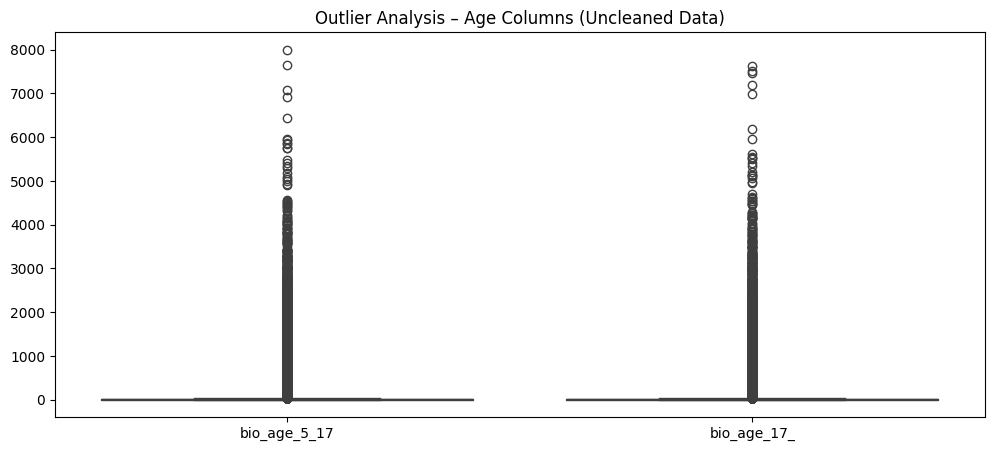

In [40]:
#BOX PLOT FOR AGE GROUPS
age_cols = ['bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(12, 5))
sns.boxplot(data=biometric[age_cols])
plt.title("Outlier Analysis – Age Columns (Uncleaned Data)")
plt.show()


In [41]:
#numeric outlier summary (IQR METHOD)
outlier_summary = {}

for col in age_cols:
    Q1 = biometric[col].quantile(0.25)
    Q3 = biometric[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = biometric[(biometric[col] < lower) | (biometric[col] > upper)]

    outlier_summary[col] = {
        "min": biometric[col].min(),
        "max": biometric[col].max(),
        "outlier_count": len(outliers)
    }

outlier_summary


{'bio_age_5_17': {'min': np.int64(0),
  'max': np.int64(8002),
  'outlier_count': 211019},
 'bio_age_17_': {'min': np.int64(0),
  'max': np.int64(7625),
  'outlier_count': 197356}}

In [42]:
#missing values check
biometric.isna().sum()


date               0
state              0
district           0
pincode            0
pincode_master     0
state_master       0
district_master    0
bio_age_5_17       0
bio_age_17_        0
dtype: int64

In [43]:
#invalid state records
valid_states = {
    'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
    'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
    'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
    'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
    'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
    'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
    'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
}

invalid_state_rows = biometric[~biometric['state'].isin(valid_states)]

print("Invalid state records:", len(invalid_state_rows))
invalid_state_rows[['state', 'district', 'pincode']].head(10)


Invalid state records: 37130


,state,district,pincode
0,Andaman & Nicobar Islands,Andamans,744101
1,Andaman and Nicobar Islands,Nicobar,744301
2,Andaman and Nicobar Islands,Nicobar,744302
3,Andaman and Nicobar Islands,Nicobar,744303
4,Andaman and Nicobar Islands,Nicobar,744304
5,Andaman and Nicobar Islands,North And Middle Andaman,744201
6,Andaman and Nicobar Islands,North And Middle Andaman,744202
7,Andaman and Nicobar Islands,North And Middle Andaman,744204
8,Andaman and Nicobar Islands,North And Middle Andaman,744205
9,Andaman and Nicobar Islands,North And Middle Andaman,744209


In [44]:
#pincode validity check
invalid_pincode = biometric[
    (~biometric['pincode'].astype(str).str.match(r'^\d{6}$'))
]

print("Invalid pincodes:", len(invalid_pincode))
invalid_pincode[['pincode']].head()


Invalid pincodes: 0


,pincode


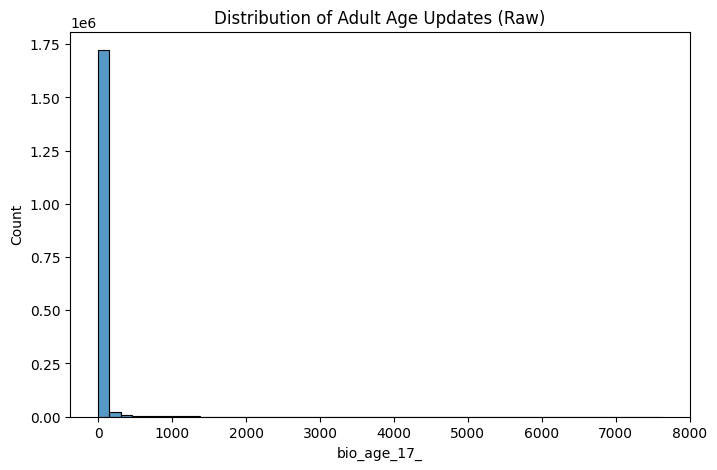

In [45]:
#histogram normal scale for bio_age_17_
plt.figure(figsize=(8, 5))
sns.histplot(biometric['bio_age_17_'], bins=50)
plt.title("Distribution of Adult Age Updates (Raw)")
plt.show()


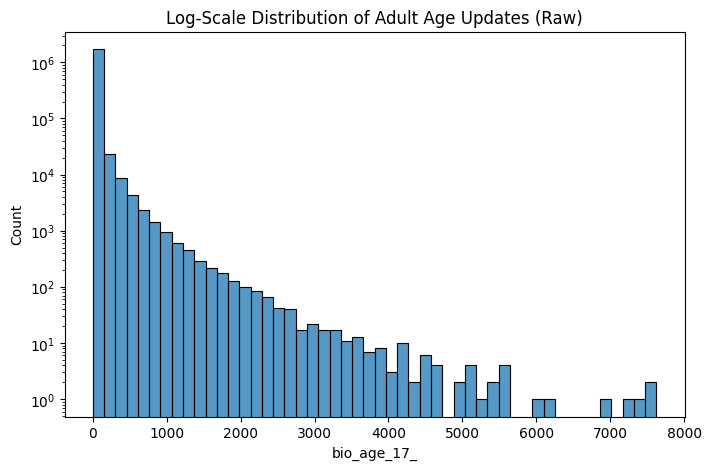

In [46]:
#histogram log scale for bio_age_17_
plt.figure(figsize=(8, 5))
sns.histplot(biometric['bio_age_17_'], bins=50)
plt.yscale('log')
plt.title("Log-Scale Distribution of Adult Age Updates (Raw)")
plt.show()


In [47]:
#overall summary statistics
eda_summary = pd.DataFrame({
    "Column": age_cols,
    "Min": biometric[age_cols].min().values,
    "Max": biometric[age_cols].max().values,
    "Mean": biometric[age_cols].mean().values,
    "Median": biometric[age_cols].median().values,
    "Skewness": biometric[age_cols].skew().values
})

eda_summary


,Column,Min,Max,Mean,Median,Skewness
0,bio_age_5_17,0,8002,19.378679,4.0,18.763403
1,bio_age_17_,0,7625,20.120031,4.0,17.567637


CLEANED DATA VISUALIZATION

In [48]:
#dropping redundant columns
biometric.drop(['state','district','pincode'], axis=1, inplace=True)

In [49]:
#renaming columns
biometric.rename(columns={
    'state_master': 'state',
    'district_master': 'district',
    'pincode_master': 'pincode'
}, inplace=True)

In [50]:
#reordering columns
new_order = ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

In [51]:
biometric= biometric[new_order]
biometric.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [52]:
#fetching final cleaned biometric data
biometric.to_csv("cleaned_biometric_data.csv",index=False)

In [53]:
cleaned_df = pd.read_csv("cleaned_biometric_data.csv")
print("Shape:", cleaned_df.shape)

print("✅ Column Names:")
print(cleaned_df.columns)

print("✅ Missing Values (Top View):")
print(cleaned_df.isna().sum())

print("✅ Duplicate Rows Count:")
print(cleaned_df.duplicated().sum())

print("✅ Unique Value Counts:")
print("Unique States   :", cleaned_df['state_master'].nunique() if 'state_master' in cleaned_df.columns else cleaned_df['state'].nunique())
print("Unique Districts:", cleaned_df['district_master'].nunique() if 'district_master' in cleaned_df.columns else cleaned_df['district'].nunique())
print("Unique Pincodes :", cleaned_df['pincode'].nunique())

Shape: (1766212, 6)
✅ Column Names:
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')
✅ Missing Values (Top View):
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64
✅ Duplicate Rows Count:
11478
✅ Unique Value Counts:
Unique States   : 36
Unique Districts: 780
Unique Pincodes : 19707


In [54]:
cleaned_df = (cleaned_df
    .groupby(['date', 'pincode','state','district'], as_index=False)
    [['bio_age_5_17', 'bio_age_17_']]
    .sum()
)

In [55]:
cleaned_df.duplicated(subset=['date', 'pincode','state','district']).sum()

np.int64(0)

In [56]:
print(cleaned_df.shape)
print(cleaned_df[['pincode','state','district']].nunique())

(1408962, 6)
pincode     19707
state          36
district      780
dtype: int64


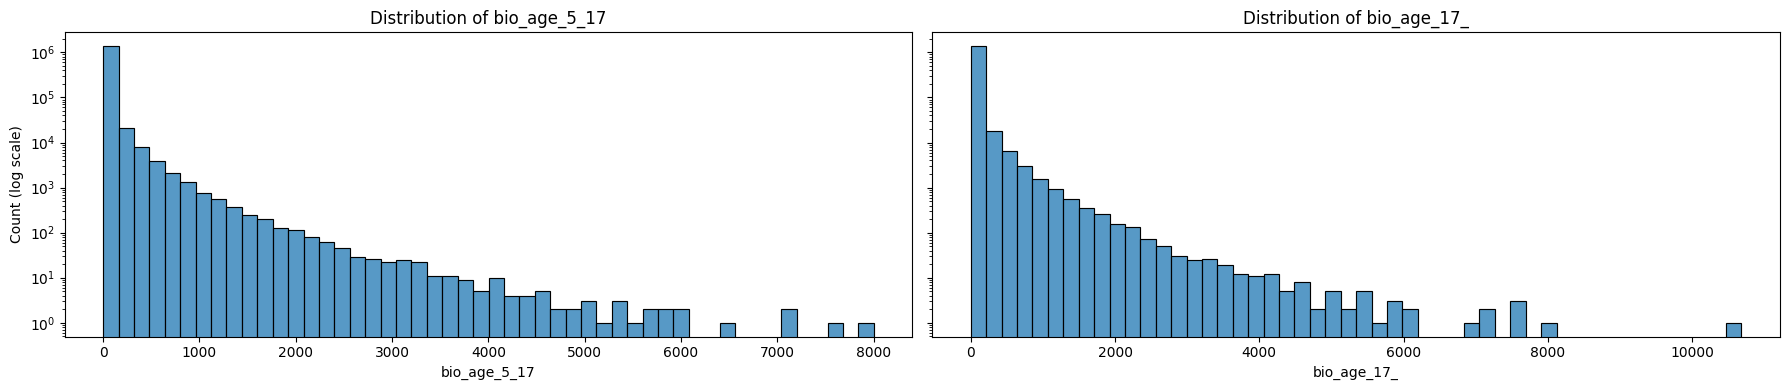

In [57]:
#histogram for age groups
cols = ['bio_age_5_17', 'bio_age_17_']

fig, axes = plt.subplots(1, 2, figsize=(18, 4), sharey=True)

for ax, c in zip(axes, cols):
    sns.histplot(cleaned_df[c], bins=50, ax=ax)
    ax.set_title(f"Distribution of {c}")
    ax.set_yscale("log")   # optional for heavy skew
    ax.set_xlabel(c)

axes[0].set_ylabel("Count (log scale)")
plt.tight_layout()
plt.show()

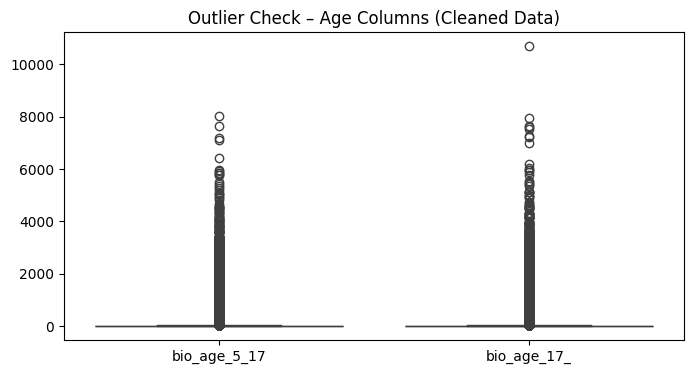

In [58]:
#outlier summary after cleaning
plt.figure(figsize=(8,4))
sns.boxplot(data=cleaned_df[cols])
plt.title("Outlier Check – Age Columns (Cleaned Data)")
plt.show()


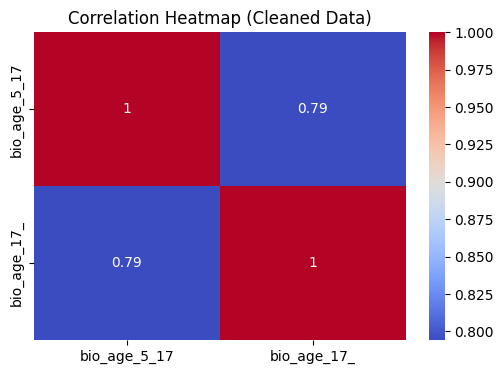

In [59]:
#correlation matrix
corr = cleaned_df[cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()


In [60]:
#converting date column to datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

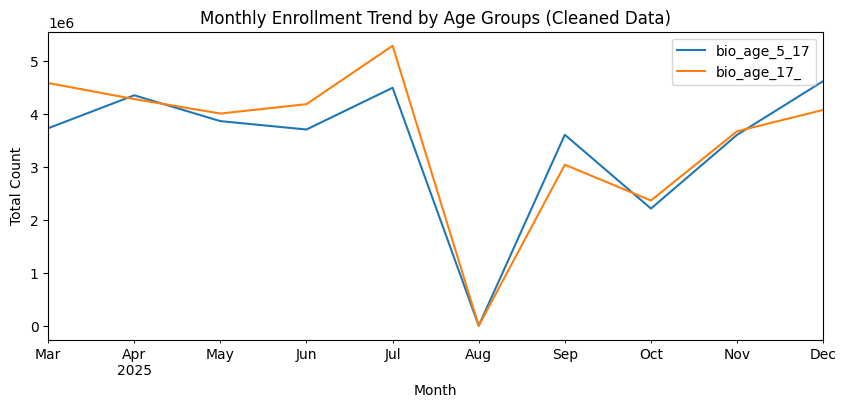

In [61]:
#time trend analysis
cols = ['bio_age_5_17', 'bio_age_17_']

cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], dayfirst=True)

monthly = (
    cleaned_df
    .set_index('date')[cols]
    .resample("ME")     # month-end
    .sum()              # sum values inside each month
)

monthly.plot(figsize=(10,4))
plt.title("Monthly Enrollment Trend by Age Groups (Cleaned Data)")
plt.ylabel("Total Count")
plt.xlabel("Month")
plt.show()


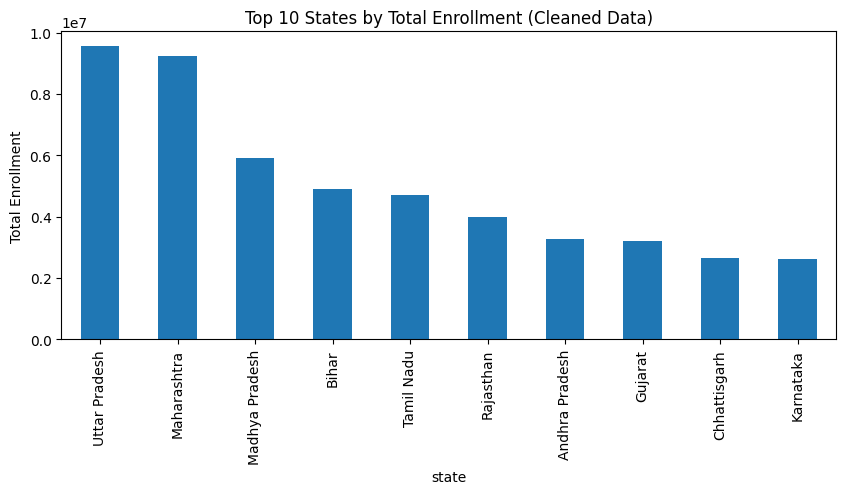

In [62]:
#top 10 state & district by total biometric enrollment
cleaned_df['total_enrollment'] = cleaned_df[cols].sum(axis=1)

top_states = (
    cleaned_df.groupby('state')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_states.plot(kind="bar", figsize=(10,4))
plt.title("Top 10 States by Total Enrollment (Cleaned Data)")
plt.ylabel("Total Enrollment")
plt.show()


In [63]:
#before & after
raw_rows = biometric.shape[0]
clean_rows = cleaned_df.shape[0]

print("BEFORE vs AFTER CLEANING")
print("------------------------")
print("Raw rows        :", raw_rows)
print("Cleaned rows    :", clean_rows)
print("Reduction %     :", round((raw_rows-clean_rows)/raw_rows*100, 2), "%")
print("Unique pincodes :", cleaned_df['pincode'].nunique())
print("Unique states   :", cleaned_df['state'].nunique())
print("Unique districts:", cleaned_df['district'].nunique())


BEFORE vs AFTER CLEANING
------------------------
Raw rows        : 1766212
Cleaned rows    : 1408962
Reduction %     : 20.23 %
Unique pincodes : 19707
Unique states   : 36
Unique districts: 780


FEATURE ENGINEERING

In [64]:
#date,year,quarter,month
cleaned_df['year'] = cleaned_df['date'].dt.year
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['month_name'] = cleaned_df['date'].dt.strftime('%B')
cleaned_df['quarter'] = cleaned_df['date'].dt.to_period('Q').astype(str)

In [65]:
#zone
zone_mapping = {
    # North
    "Jammu And Kashmir": "North",
    "Ladakh": "North",
    "Himachal Pradesh": "North",
    "Punjab": "North",
    "Haryana": "North",
    "Delhi": "North",
    "Chandigarh": "North",
    "Uttarakhand": "North",
    "Uttar Pradesh": "North",
    
    # West
    "Rajasthan": "West",
    "Gujarat": "West",
    "Goa": "West",
    "Maharashtra": "West",
    "Dadra And Nagar Haveli And Daman And Diu": "West",
    
    # Central
    "Madhya Pradesh": "Central",
    "Chhattisgarh": "Central",
    
    # East
    "Bihar": "East",
    "Jharkhand": "East",
    "West Bengal": "East",
    "Odisha": "East",
    
    # South
    "Andhra Pradesh": "South",
    "Telangana": "South",
    "Karnataka": "South",
    "Tamil Nadu": "South",
    "Kerala": "South",
    "Puducherry": "South",
    "Lakshadweep": "South",
    
    # North-East
    "Assam": "North-East",
    "Arunachal Pradesh": "North-East",
    "Manipur": "North-East",
    "Meghalaya": "North-East",
    "Mizoram": "North-East",
    "Nagaland": "North-East",
    "Sikkim": "North-East",
    "Tripura": "North-East",
    
    # Islands
    "Andaman And Nicobar Islands": "Islands"
}
cleaned_df['zone'] = cleaned_df['state'].map(zone_mapping)


In [66]:
#checking missing zone values
cleaned_df['zone'].isna().sum()


np.int64(0)

In [67]:
cleaned_df['state'].unique()

array(['Delhi', 'Haryana', 'Punjab', 'Chandigarh', 'Himachal Pradesh',
       'Jammu And Kashmir', 'Ladakh', 'Uttar Pradesh', 'Uttarakhand',
       'Rajasthan', 'Telangana', 'Gujarat',
       'Dadra And Nagar Haveli And Daman And Diu', 'Maharashtra', 'Goa',
       'Madhya Pradesh', 'Chhattisgarh', 'Andhra Pradesh', 'Karnataka',
       'Tamil Nadu', 'Puducherry', 'Kerala', 'Lakshadweep', 'West Bengal',
       'Sikkim', 'Andaman And Nicobar Islands', 'Odisha', 'Assam',
       'Meghalaya', 'Arunachal Pradesh', 'Manipur', 'Mizoram', 'Nagaland',
       'Tripura', 'Bihar', 'Jharkhand'], dtype=object)

In [68]:
cleaned_df.columns

Index(['date', 'pincode', 'state', 'district', 'bio_age_5_17', 'bio_age_17_',
       'total_enrollment', 'year', 'month', 'month_name', 'quarter', 'zone'],
      dtype='object')

In [69]:
#new order of columns
cleaned_df = cleaned_df[
    [
        'date', 'year', 'quarter', 'month', 'month_name',
        'zone', 'state', 'district', 'pincode',
        'bio_age_5_17', 'bio_age_17_'
    ]
]


In [70]:
#verifying new order
cleaned_df.columns

Index(['date', 'year', 'quarter', 'month', 'month_name', 'zone', 'state',
       'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'],
      dtype='object')

In [71]:
cleaned_df.to_csv("cleaned_biometric_data.csv")